## Conservation of G4 sequences

In [1]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pybedtools import BedTool
from pathlib import Path
import attr
from attr import field
import os
import polars as pl
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pybedtools import BedTool
from pathlib import Path
import attr
from attr import field
import os
import sys

sys.path.insert(0, "/storage/group/izg5139/default/nicole/g4_t2t_identification/scripts")
from dotenv import load_dotenv
load_dotenv("/storage/group/izg5139/default/nicole/g4_t2t_identification/scripts/.env")
from constants import ConfigPaths

In [2]:
g4_df = pl.read_csv(g
g4_df

seqID,start,end,sequence,score,motif_strand,GRUN_counts,LOOP_ratio,avg_methylation,methylation_count,methylation_level
str,i64,i64,str,f64,str,i64,f64,f64,i64,str
"""chr1""",1844,1871,"""ccctaaccctaaccctaaccctaaccc""",-1.67,"""-""",5,44.444444,0.972,1,"""Hypermethylated"""
"""chr1""",1850,1877,"""ccctaaccctaaccctaacccgaaccc""",-1.63,"""-""",5,44.444444,0.972,2,"""Hypermethylated"""
"""chr1""",2159,2187,"""accctaaccctaaccctaacccgaccct""",-1.57,"""-""",5,46.428571,0.412,1,"""Methylated"""
"""chr1""",2166,2192,"""ccctaaccctaacccgaccctgaccc""",-1.65,"""-""",5,42.307692,0.412,1,"""Methylated"""
"""chr1""",2172,2198,"""ccctaacccgaccctgaccctgaccc""",-1.62,"""-""",5,42.307692,0.412,1,"""Methylated"""
…,…,…,…,…,…,…,…,…,…,…
"""chrX""",154251912,154251943,"""gtctccgggggctgggggaatcagggtttc…",1.26,"""+""",3,58.064516,0.514,1,"""Methylated"""
"""chrX""",154252040,154252068,"""actccatccctcctgtgcccccaccgca""",-1.43,"""-""",2,71.428571,0.209,1,"""Methylated"""
"""chrX""",154255705,154255747,"""gcacggcgcccccgcaccccgccgccccca…",-1.48,"""-""",4,59.52381,0.867444,9,"""Hypermethylated"""


In [18]:
path = Path("/storage/group/izg5139/default/nicole/g4_t2t_analysis/homologous")

files = [f for f in path.glob("*hs1.bed") if f.name.endswith(".hs1.bed")]
print(files)
densities = {}
e = Expander(window_size=2000)
window_size = 2000
extractor = PWMExtractor()
e = Expander(window_size=window_size)

files = [Path("/storage/group/izg5139/default/nicole/g4_t2t_analysis/homologous/GSM4322057_TK6_DMSO_Rep1.hs1.bed")]
for file in tqdm(files):
    df = pl.from_pandas(
            pd.read_csv(file, 
                     header=None, 
                     sep="\t",
                        dtype={"seqID": str},
                    names=["seqID", "start", "end", "overlap2"]
                    )
        )
    # df["length"] = df["end"] - df["start"]
    # print(df["length"].sum())
    
    df_win = BedTool.from_dataframe(
                                        e.expand_windows(df.with_columns(pl.lit("+").alias("strand")), 
                                                         loci="mid")
                                            .to_pandas()
                                        ).sort()

    intersect_df = pl.read_csv(
                        df_win.intersect(g4_bed, wo=True).fn,
                        has_header=False, 
                        separator="\t",
                        new_columns=["seqID", "start", "end", "overlap2", "strand", "mid", "chrom", "motif_start", "motif_end", "overlap"]
                    )
    density = extractor.extract_density(intersect_df, window_size=window_size)
    density = density / np.mean(density)
    densities[file.name] = density
    print(file)
    break


[PosixPath('/storage/group/izg5139/default/nicole/g4_t2t_analysis/homologous/GSM4322057_TK6_DMSO_Rep1.hs1.bed'), PosixPath('/storage/group/izg5139/default/nicole/g4_t2t_analysis/homologous/GSM4322057_TK6_DMSO_Rep2.hs1.bed'), PosixPath('/storage/group/izg5139/default/nicole/g4_t2t_analysis/homologous/GSM4322059_TK6_DMSO_Rep2.hs1.bed')]


  0%|          | 0/1 [00:48<?, ?it/s]

/storage/group/izg5139/default/nicole/g4_t2t_analysis/homologous/GSM4322057_TK6_DMSO_Rep1.hs1.bed


## PRMD9 Hotspots

In [62]:
xs = np.linspace(0, 100.0, 200)

In [8]:
PRMD9_PATH = ConfigPaths.PRMD9.value # Path("/storage/group/izg5139/default/nicole/g4_t2t_analysis/DSBhotspots_hs1/")
PRMD9_PATH

PosixPath('/storage/group/izg5139/default/nicole/g4_t2t_analysis/DSBhotspots_hs1')

In [9]:
!ls /storage/group/izg5139/default/nicole/g4_t2t_analysis/DSBhotspots_hs1/

AA1.peaks.hs1.bed   AA4a.peaks.unmapped  AN.peaks.hs1.bigwig
AA1.peaks.unmapped  AA4b.peaks.hs1.bed	 AN.peaks.hs1.sorted.bed
AA2.peaks.hs1.bed   AA4b.peaks.unmapped  AN.peaks.hs1.sorted.mod.bed
AA2.peaks.unmapped  AB1.peaks.hs1.bed	 AN.peaks.sorted.hs1.bed
AA3.peaks.hs1.bed   AB1.peaks.unmapped	 AN.peaks.unmapped
AA3.peaks.unmapped  AC.peaks.hs1.bed	 CL4.peaks.hs1.bed
AA4.peaks.hs1.bed   AC.peaks.unmapped	 CL4.peaks.unmapped
AA4.peaks.unmapped  AN.peaks.hs1.bed	 bedGraphToBigWig
AA4a.peaks.hs1.bed  AN.peaks.hs1.bigWig  genome.txt


In [10]:
hotspots = {f.name.split('.')[0]: pl.read_csv(f, 
                                              separator="\t", 
                                              has_header=False, 
                                              new_columns=["seqID", "start", "end"]
                                             ) for f in PRMD9_PATH.glob("*peaks.hs1.bed")}
hotspots['AA1']

seqID,start,end
str,i64,i64
"""chr1""",298662,299792
"""chr1""",308475,309395
"""chr1""",337110,338759
"""chr1""",357435,358567
"""chr1""",362547,363619
…,…,…
"""chrY""",22532629,22534123
"""chrY""",22656583,22658747
"""chrY""",22678313,22680315


In [11]:
prmd9_hotspots = []
valid_hotspots = {"AA1", "AA2", "AA3", "AA4", "AB1", "AC", "AN", "CL4"}
for hotspot, df in hotspots.items():
    if hotspot in valid_hotspots:
        prmd9_hotspots.append(df.with_columns(
                                    pl.lit(hotspot).alias("allele")
                                    )
                         )
prmd9_hotspots = pl.concat(prmd9_hotspots)
prmd9_hotspots_bed = BedTool.from_dataframe(prmd9_hotspots.to_pandas()).sort()
prmd9_hotspots

seqID,start,end,allele
str,i64,i64,str
"""chr1""",298662,299792,"""AA1"""
"""chr1""",308475,309395,"""AA1"""
"""chr1""",337110,338759,"""AA1"""
"""chr1""",357435,358567,"""AA1"""
"""chr1""",362547,363619,"""AA1"""
…,…,…,…
"""chrY""",22333026,22333942,"""CL4"""
"""chrY""",22467790,22469182,"""CL4"""
"""chrY""",22469680,22470821,"""CL4"""


In [12]:
seqfa = prmd9_hotspots_bed.sequence(fi=str(ConfigPaths.FASTA.value), name=True, tab=True)
seqfa

<BedTool(/tmp/pybedtools.r97ent77.tmp)>

In [13]:
prmd9_hotspots_bed.head()

chr1	285986	287133	AC
 chr1	289256	290685	AC
 chr1	298606	299529	AA2
 chr1	298619	299427	AA3
 chr1	298622	299518	AC
 chr1	298662	299792	AA1
 chr1	298692	299716	AB1
 chr1	298696	299735	AA4
 chr1	306593	307601	CL4
 chr1	307020	307911	AC
 

In [14]:
prmd9_hotspots_with_gc = []

with open(seqfa.seqfn, mode="r", encoding="utf-8") as f:
    for line in f:
        line, sequence = line.strip().split("\t")
        sequence_length = len(sequence.strip().lower())
        gc_content = sequence.count("g") + sequence.count("g")
        gc_proportion = gc_content / sequence_length
        allele = line.split('::')[0]
        seqID = line.split('::')[1].split(':')[0]
        start, end = line.split(':')[-1].split('-')
        start = int(start)
        end = int(end)
        
        prmd9_hotspots_with_gc.append(
                        {
                        "seqID": seqID,
                         "start": start,
                         "end": end,
                         "allele": allele,
                         "gc_proportion": gc_proportion,
                         "gc_content": gc_content,
                         "sequence_length": sequence_length
                        }
                )
        
prmd9_hotspots_with_gc = pl.DataFrame(prmd9_hotspots_with_gc)
# \
#                             .join(
#                                     G4_densities,
#                                     on="seqID",
#                                     how="left"
#                             )
prmd9_hotspots_with_gc

seqID,start,end,allele,gc_proportion,gc_content,sequence_length
str,i64,i64,str,f64,i64,i64
"""chr1""",285986,287133,"""AC""",0.022668,26,1147
"""chr1""",289256,290685,"""AC""",0.212736,304,1429
"""chr1""",298606,299529,"""AA2""",0.052004,48,923
"""chr1""",298619,299427,"""AA3""",0.04703,38,808
"""chr1""",298622,299518,"""AC""",0.042411,38,896
…,…,…,…,…,…,…
"""chrY""",27296694,27298360,"""AB1""",0.333733,556,1666
"""chrY""",27296774,27298185,"""AA3""",0.328845,464,1411
"""chrY""",27296829,27298170,"""AA4""",0.328113,440,1341


In [15]:
import sys; sys.path.insert(0, "/storage/group/izg5139/default/nicole/g4_t2t_identification/scripts")
from dotenv import load_dotenv
loaded = load_dotenv("/storage/group/izg5139/default/nicole/g4_t2t_identification/scripts/.env")
print(loaded)
from constants import ConfigPaths
import pandas as pd
from pybedtools import BedTool

# load g4hunter
g4_df = pd.read_table(ConfigPaths.G4HUNTER.value)
g4_bed = BedTool.from_dataframe(g4_df.drop(columns=['NBR'])).sort()

# load control group
control_df = pd.read_table(ConfigPaths.CONTROL_G4HUNTER.value)
control_bed = BedTool.from_dataframe(control_df).sort()


genome_size = pd.read_table(ConfigPaths.GENOME_SIZE.value, header=None)[1].sum()

# test validity of control group
g4_gw_density = pd.read_table(
                            g4_bed.sort().merge().fn, 
                            header=None, 
                            names=["seqID", "start", "end"]
)
g4_gw_density["size"] = g4_gw_density["end"] - g4_gw_density["start"]
g4_gw_density = g4_gw_density["size"].sum() * 1e6 / genome_size

# CONTROL DENSITY
control_gw_density = pd.read_table(
                            control_bed.sort().merge().fn, header=None, names=["seqID", "start", "end"]
)
control_gw_density["size"] = control_gw_density["end"] - control_gw_density["start"]
control_gw_density = control_gw_density["size"].sum() * 1e6 / genome_size

g4_gw_density, control_gw_density

True


(17745.228794041104, 22841.721083902157)

In [16]:
COVERAGE_FIELDS = [
                    "totalHits", 
                   "overlappingBp", 
                   "compartmentLength", 
                   "coverage"
                  ]
prmd9_hotspots_with_gc_bed = BedTool.from_dataframe(prmd9_hotspots_with_gc.to_pandas()).sort()

g4_coverage_prmd9 = pl.read_csv(
                        prmd9_hotspots_with_gc_bed.coverage(g4_bed).fn,
                        has_header=False, 
                        separator="\t", 
                        new_columns=["seqID", "start", "end", "allele", "gc_proportion", "gc_content",
                                     "sequence_length"] + COVERAGE_FIELDS
                        )\
                    .with_columns(
                                  (1e6 * pl.col("coverage")).alias("coverage"), 
                                  (pl.col("totalHits") > 0).cast(pl.Int8).alias("atLeastOne")
                        )

In [17]:
g4_coverage_prmd9_enrichment = g4_coverage_prmd9.group_by("allele")\
                                                .agg(
                                                        (pl.col("atLeastOne").mean() * 1e2).alias("atLeastOne_perc"),
                                                         pl.col("overlappingBp").sum(),
                                                         pl.col("compartmentLength").sum(),
                                                         pl.col("atLeastOne").sum().alias("atLeastOne_total"),
                                                        pl.col("gc_content").sum().alias("gc_content"),
                                                )\
                                                .with_columns(
                                                            ((pl.col("overlappingBp") * 1e6) / pl.col("compartmentLength")).alias("G4 Density"),
                                                            (pl.col("gc_content") / pl.col("compartmentLength")).alias("gc_proportion"),
                                                    )\
                                                .with_columns(
                                                            (pl.col("G4 Density") / g4_gw_density).alias("fold_enrichment")
                                                    )

g4_coverage_prmd9_enrichment

allele,atLeastOne_perc,overlappingBp,compartmentLength,atLeastOne_total,gc_content,G4 Density,gc_proportion,fold_enrichment
str,f64,i64,i64,i64,i64,f64,f64,f64
"""AA1""",62.047968,2005958,50478952,19972,10539836,39738.503287,0.208797,2.239391
"""AA3""",64.356324,1164803,22312794,11393,4576662,52203.368166,0.205114,2.941826
"""AA4""",62.462619,1367486,28247676,14412,5754656,48410.56659,0.203721,2.728089
"""AA2""",61.810367,2260197,52036609,23729,10997556,43434.748025,0.211343,2.447686
"""AB1""",62.535337,1704868,36923052,16812,7938084,46173.5395,0.21499,2.602026
"""AC""",57.233153,2390593,74741790,27255,15381124,31984.690225,0.20579,1.802439
"""AN""",61.147162,1566988,37371877,16396,7609918,41929.60391,0.203627,2.362866
"""CL4""",51.182304,606109,19784721,8052,3777458,30635.205824,0.190928,1.726391


In [18]:
import adjust_gc_content
from adjust_gc_content import adjust_for_gc_content, correct_multiple_comparisons
import importlib
importlib.reload(adjust_gc_content)
g4_coverage_prmd9_enrichment_adj = adjust_for_gc_content(g4_coverage_prmd9_enrichment, alternative="two-tailed")
g4_coverage_prmd9_enrichment_adj = correct_multiple_comparisons(g4_coverage_prmd9_enrichment_adj)
g4_coverage_prmd9_enrichment_adj = g4_coverage_prmd9_enrichment_adj.with_columns(
                                                                        pl.col("adj_significance").map_elements(lambda sig: "#1c41e8" if sig != "ns" else "#d42089", 
                                                                                                                return_dtype=str).alias("significance_color")
)
g4_coverage_prmd9_enrichment_adj

/storage/group/izg5139/default/nicole/g4_t2t_identification/scripts/adjust_gc_content.py:127: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  .with_columns(


allele,atLeastOne_perc,overlappingBp,compartmentLength,atLeastOne_total,gc_content,G4 Density,gc_proportion,fold_enrichment,predicted_enrichment,res,percentile,pval,gc_stars,adj_pval,adj_significance,-log(pval_adj),-log(pval),significance_color
str,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str,f64,str,f64,f64,str
"""AA1""",62.047968,2005958,50478952,19972,10539836,39738.503287,0.208797,2.239391,1.42549,0.813901,99.541585,0.009168,"""**""",0.012224,"""*""",1.912772,2.037711,"""#1c41e8"""
"""AA3""",64.356324,1164803,22312794,11393,4576662,52203.368166,0.205114,2.941826,1.497901,1.443925,99.934512,0.00131,"""**""",0.005239,"""**""",2.280749,2.882809,"""#1c41e8"""
"""AA4""",62.462619,1367486,28247676,14412,5754656,48410.56659,0.203721,2.728089,1.525865,1.202224,99.869024,0.00262,"""**""",0.006985,"""**""",2.15581,2.581779,"""#1c41e8"""
"""AA2""",61.810367,2260197,52036609,23729,10997556,43434.748025,0.211343,2.447686,1.376748,1.070938,99.803536,0.003929,"""**""",0.007859,"""**""",2.104658,2.405688,"""#1c41e8"""
"""AB1""",62.535337,1704868,36923052,16812,7938084,46173.5395,0.21499,2.602026,1.308803,1.293223,99.934512,0.00131,"""**""",0.005239,"""**""",2.280749,2.882809,"""#1c41e8"""
"""AC""",57.233153,2390593,74741790,27255,15381124,31984.690225,0.20579,1.802439,1.484434,0.318005,96.201703,0.075966,"""ns""",0.086818,"""ns""",1.061389,1.119381,"""#d42089"""
"""AN""",61.147162,1566988,37371877,16396,7609918,41929.60391,0.203627,2.362866,1.527776,0.835091,99.541585,0.009168,"""**""",0.012224,"""*""",1.912772,2.037711,"""#1c41e8"""
"""CL4""",51.182304,606109,19784721,8052,3777458,30635.205824,0.190928,1.726391,1.797886,-0.071495,22.134905,0.442698,"""ns""",0.442698,"""ns""",0.353892,0.353892,"""#d42089"""


In [ ]:
g4_coverage_prmd9_enrichment_adj.select(["

/tmp/ipykernel_2648261/3773306538.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_ = sns.barplot(data=g4_coverage_prmd9_enrichment_adj.to_pandas(),


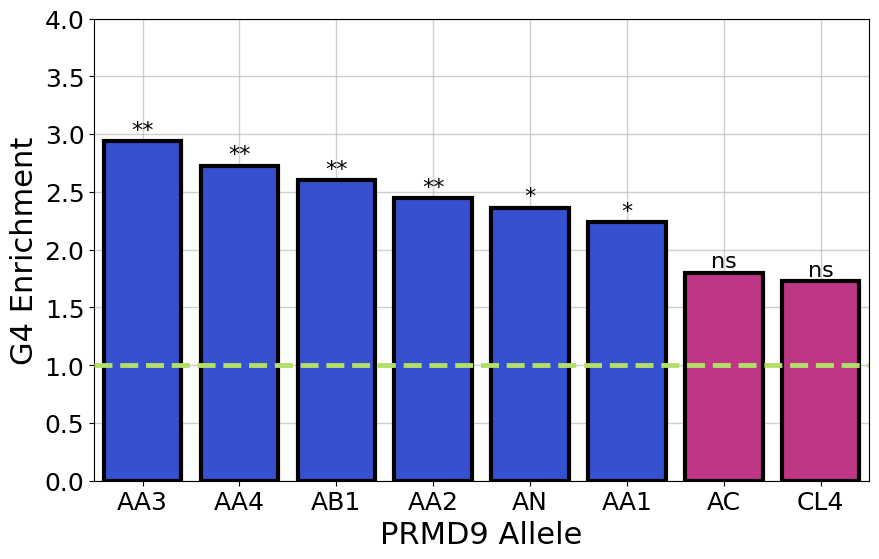

In [60]:
MODE = "G4HUNTER"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
g4_coverage_prmd9_enrichment_adj = g4_coverage_prmd9_enrichment_adj.sort(['fold_enrichment'], descending=True)

ax_ = sns.barplot(data=g4_coverage_prmd9_enrichment_adj.to_pandas(), 
            x="allele", 
            y="fold_enrichment", 
            capsize=.3,
            palette=list(g4_coverage_prmd9_enrichment_adj["significance_color"]),
            alpha=1.0,
            color='gray',
            ax=ax, 
            linewidth=3.0,
            zorder=3
           )
ax.grid(lw=1.0, alpha=0.6)
ax.xaxis.label.set_size(22)
ax.yaxis.label.set_size(22)
ax.tick_params(axis="both", labelsize=18, zorder=0)
ax.set_ylabel("G4 Enrichment")
ax.set_xlabel("PRMD9 Allele")
ax.set_axisbelow(True)


for patch in ax_.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor('black')


# Annotate the p-value stars on top of the bars
for i, row in enumerate(g4_coverage_prmd9_enrichment_adj.iter_rows(named=True)):
    ax.annotate(row['adj_significance'], 
                xy=(i, row['fold_enrichment'] - 0.05), 
                xytext=(0, 5),  # Offset above the bar
                textcoords='offset points', 
                ha='center', 
                va='bottom', 
                fontsize=16, 
                color='black')
ax.set_ylim(ymax=4.0)
ax.axhline(1.0, linestyle='--', color=sns.color_palette("Set3")[6], lw=3.5, zorder=5)

target = Path("/storage/group/izg5139/default/nicole/g4_t2t_identification/figures/prmd9").resolve()
target.mkdir(exist_ok=True)
fig.savefig(f"{target}/prmd9_enrichment_gc_corrected_{MODE}.pdf", dpi=300, bbox_inches="tight")

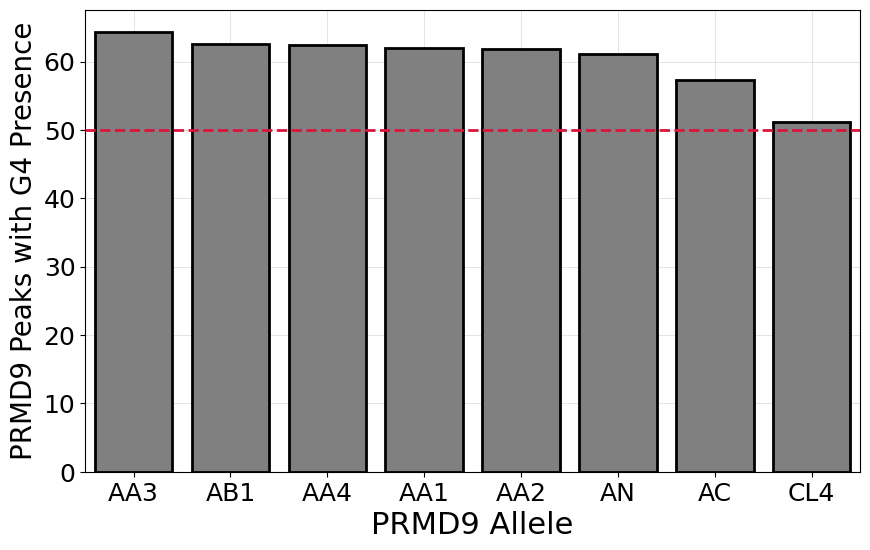

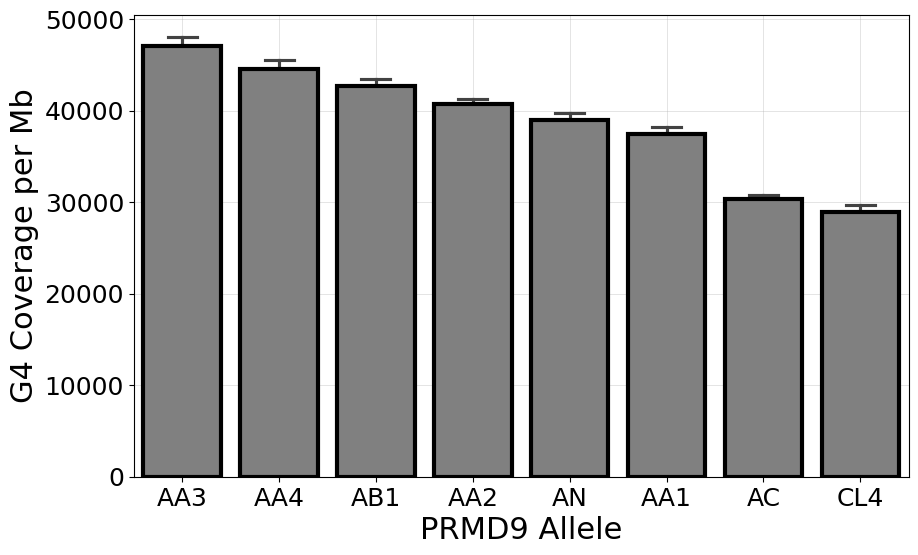

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

sns.barplot(data=g4_coverage_prmd9.group_by("allele")\
                                  .agg((1e2 * pl.col("atLeastOne").mean())\
                                  .alias("atLeastOne")).sort(by=['atLeastOne'], descending=True), 
            x="allele", 
            linewidth=2.0,
            color='gray',
            y="atLeastOne", 
            edgecolor='black',
            ax=ax, 
            zorder=3)
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.xaxis.label.set_size(22)
ax.yaxis.label.set_size(20)
ax.tick_params(axis="both", labelsize=18, zorder=0)
ax.set_ylabel("PRMD9 Peaks with G4 Presence")
ax.set_xlabel("PRMD9 Allele")
ax.axhline(50.0, 
           linestyle='--', 
           color='crimson', 
           lw=2.0, 
           zorder=5)


fig.savefig(f"{target}/prmd9_g4_presence_{MODE}.pdf", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.barplot(data=g4_coverage_prmd9, 
            x="allele", 
            y="coverage", 
            order=list(g4_coverage_prmd9.group_by("allele").agg(pl.col("coverage").mean()).sort(['coverage'], descending=True)['allele']),
            capsize=.3,
            color='gray',
                        edgecolor='black',

            ax=ax, 
            linewidth=3.0,
            zorder=3
           )
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.xaxis.label.set_size(22)
ax.yaxis.label.set_size(22)
ax.tick_params(axis="both", labelsize=18, zorder=0)
ax.set_ylabel("G4 Coverage per Mb")
ax.set_xlabel("PRMD9 Allele")
fig.savefig(f"{target}/prmd9_g4_coverage_per_mB_{MODE}.pdf", dpi=300, bbox_inches="tight")

## PRMD9 Densities

In [19]:
import sys
sys.path.insert(0, "/storage/group/izg5139/default/external/quadrupia_database/g4/transfer_coverage")
from gff_utils import GFFExtractor

e = GFFExtractor(compartments=["enhancer", "gene", "exon", "CDS"])
from pwm_density import PWMExtractor; extractor = PWMExtractor()
from gff_utils import Expander; e = Expander(window_size=2000)
e

Expander(window_size=2000)

In [ ]:
g4_df = pl.read_csv(paths.G4, separator="\t").drop(["NBR"]).sort(["seqID", "start"], descending=False)
g4_df

In [ ]:
g4_df = pl.read_csv(paths.G4, separator="\t").drop(["NBR"]).sort(["seqID", "start"], descending=False)

g4_bed = BedTool.from_dataframe(g4_df.select(["seqID", "start", "end"]).to_pandas()).sort()
g4_bed.head()

In [ ]:
window_size = 2000
for name, df in hotspots.items():
    df = df.with_columns(pl.lit("+").alias("strand"))
    prmd9_expanded = e.expand_windows(df, loci="mid")
    df_bed = BedTool.from_dataframe(prmd9_expanded.to_pandas()).sort()
    intersect_df = pl.read_csv(
                    df_bed.intersect(mutations_df_deleted, wo=True).fn,
                    has_header=False,
                    separator="\t",
                    new_columns=["seqID", "start", "end", "strand", "mid", "chromosome", "motif_start", "motif_end", "overlap"]
    )
    density = extractor.extract_density(intersect_df, window_size=window_size)
    break

In [220]:
g4_controls_bed = BedTool.from_dataframe(g4_controls.select(["seqID", 'start', 'end']).to_pandas()).sort().merge().sort()
g4_controls_bed.count()

2112270

In [222]:
g4_bed = BedTool.from_dataframe(g4_df.select(["seqID", "start", "end"]).to_pandas()).sort()
g4_bed.count()

NameError: name 'b4_bed' is not defined

In [223]:
g4_bed.count()

2081181

In [238]:
!ls /storage/group/izg5139/default/nicole/g4_t2t_analysis/densities/

PRMD9_allele_AA1_g4hunter_controls_density_bootstrap_1000_window_2000_alpha_0.05.csv
PRMD9_allele_AA1_g4hunter_density_bootstrap_1000_window_2000_alpha_0.05.csv
PRMD9_allele_AA2_g4hunter_controls_density_bootstrap_1000_window_2000_alpha_0.05.csv
PRMD9_allele_AA2_g4hunter_density_bootstrap_1000_window_2000_alpha_0.05.csv
PRMD9_allele_AA3_g4hunter_controls_density_bootstrap_1000_window_2000_alpha_0.05.csv
PRMD9_allele_AA3_g4hunter_density_bootstrap_1000_window_2000_alpha_0.05.csv
PRMD9_allele_AA4_g4hunter_controls_density_bootstrap_1000_window_2000_alpha_0.05.csv
PRMD9_allele_AA4_g4hunter_density_bootstrap_1000_window_2000_alpha_0.05.csv
PRMD9_allele_AA4a_g4hunter_controls_density_bootstrap_1000_window_2000_alpha_0.05.csv
PRMD9_allele_AA4a_g4hunter_density_bootstrap_1000_window_2000_alpha_0.05.csv
PRMD9_allele_AA4b_g4hunter_controls_density_bootstrap_1000_window_2000_alpha_0.05.csv
PRMD9_allele_AA4b_g4hunter_density_bootstrap_1000_window_2000_alpha_0.05.csv
PRMD9_allele_AB1_g4hunter_cont

In [20]:
densities_path = Path("/storage/group/izg5139/default/nicole/g4_t2t_identification/scripts/PRMD9_densities_G4HUNTER/")
densities_path

PosixPath('/storage/group/izg5139/default/nicole/g4_t2t_identification/scripts/PRMD9_densities_G4HUNTER')

In [21]:
window_size = 2000
N = 1000
alpha = 0.05
allele = "AC"

def load_density(mode, window_size, alpha, N, allele, control=False):
    densities_path = Path(f"/storage/group/izg5139/default/nicole/g4_t2t_identification/scripts/PRMD9_densities_{mode}/")
    if not control:
        return pd.read_csv(densities_path.joinpath(f"PRMD9_allele_{allele}_g4hunter_density_bootstrap_{N}_window_{window_size}_alpha_{alpha}.csv"),
                       sep=",",
                       index_col=0
                      )
    return pd.read_csv(densities_path.joinpath(f"PRMD9_allele_{allele}_g4hunter_controls_density_bootstrap_{N}_window_{window_size}_alpha_{alpha}.csv"),
                       sep=",",
                       index_col=0
                      )

mode = "G4HUNTER"
density_df = load_density(mode, allele=allele, window_size=window_size, alpha=alpha, N=N)
density_df

,average,q0025,q0975
0,0.856,0.809,0.905
1,0.862,0.813,0.911
2,0.853,0.804,0.902
3,0.845,0.796,0.892
4,0.849,0.801,0.897
...,...,...,...
3996,0.911,0.856,0.958
3997,0.917,0.864,0.965
3998,0.924,0.871,0.974
3999,0.915,0.863,0.964


In [42]:
allele = "AA4"

for allele in hotspots:
    density = load_density(mode, allele=allele, window_size=window_size, alpha=alpha, N=N)
    density_control = load_density(mode, allele=allele, window_size=window_size, alpha=alpha, N=N, control=True)
    print(allele, 2000 - density.average.argmax())
    print(density.loc[density.average.argmax(), 'average'] / density_control.loc[density.average.argmax(), 'average'])


AA1 10
1.4654411764705881
AA2 42
1.4098591549295774
AA3 22
1.4821162444113263
AA4 -37
1.4104741684359519
AA4a 1
1.3955650929899859
AA4b -11
1.409570724841661
AB1 -14
1.4714285714285715
AC 5
1.3442231075697213
AN 0
1.4634334103156275
CL4 13
1.140080971659919


In [37]:
density_AA4.average.argmax()

2037

In [38]:
density_AB1.loc[density_AB1.average.argmax(), 'average'] / density_AB1_control.loc[density_AB1.average.argmax(), 'average']

1.4714285714285715

In [30]:
density_AA4.loc[density_AA4.average.argmax(), 'average'] / density_AA4_control.loc[density_AA4.average.argmax(), 'average']

1.4104741684359519

In [31]:
density_CL4.loc[density_CL4.average.argmax(), 'average'] / density_CL4_control.loc[density_CL4.average.argmax(), 'average']

1.140080971659919

In [26]:
density_AA4_control.average.argmax()

2028

In [70]:
color_templates = {'template': {
                                'Viruses': '#B1C266',
                                'Bacteria': '#A6391B',
                                'Eukaryota': '#2D4080',
                                'Archaea': '#D13B6D'
                                },
                   'non-template': {'Viruses': '#66C28B',
                                    'Bacteria': '#FC8D62',
                                   'Eukaryota': '#6CA5C4',
                                   'Archaea': '#9A3BD1'},
                   }

8
0
1
2
3
4
5
6
7


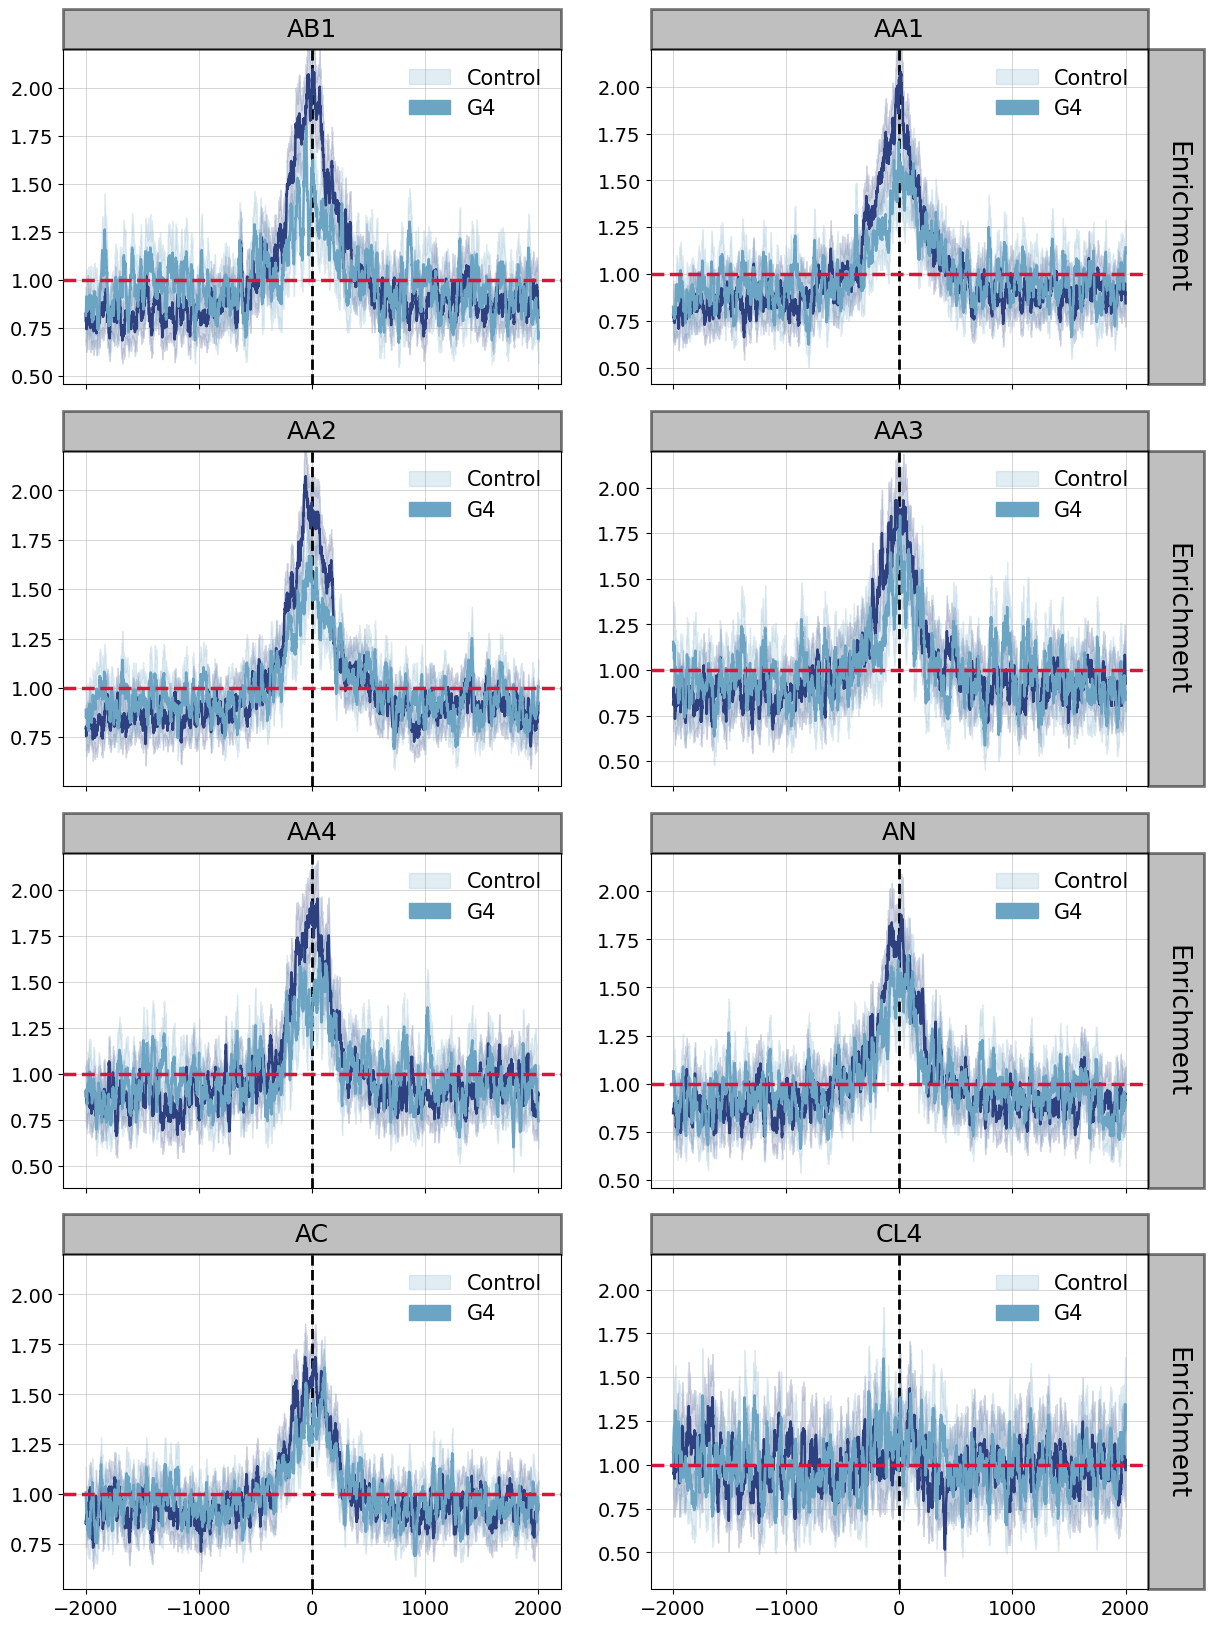

In [87]:
from matplotlib.pyplot import Rectangle
from matplotlib import patches as mpatches

kolmogorov_tests = dict()

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
ax = ax.flatten()

plt.subplots_adjust(wspace=0.18, hspace=0.2)
kolmogorov_tests = dict()
linewidth = 1.8
MODE = "REGEX"
alleles = list(g4_coverage_prmd9_enrichment["allele"])
print(len(alleles))

alleles = ["AB1", "AA1", "AA2", "AA3", "AA4", "AN", "AC", "CL4"]
for idx, allele in enumerate(alleles):
    print(idx)
    df = load_density(MODE, allele=allele, window_size=window_size, alpha=alpha, N=N)
    df_control = load_density(MODE, allele=allele, window_size=window_size, alpha=alpha, N=N, control=True)

    cols = list(map(str,range(-window_size, window_size+1)))

    mean_values = df['average'].values
    ci_lower = df['q0025'].values
    ci_upper = df['q0975'].values

    control_mean_values = df_control['average'].values
    control_ci_lower = df_control['q0025'].values
    control_ci_upper = df_control['q0975'].values

    xaxis = range(-window_size, window_size+1)
    ax[idx].plot(xaxis, 
                    mean_values, 
                    color=color_templates['template']["Eukaryota"], 
                    lw=linewidth, 
                    zorder=3,
                    label="G4")
    ax[idx].fill_between(xaxis, 
                        y1=ci_lower, 
                        y2=ci_upper,
                        color=color_templates['template']["Eukaryota"], 
                            alpha=0.2
                    )

    ax[idx].plot(xaxis, 
            control_mean_values, 
            color=color_templates['non-template']["Eukaryota"], 
            lw=linewidth, 
            zorder=3,
            label="Control"
                )
    ax[idx].fill_between(xaxis, 
                     y1=control_ci_lower, 
                     y2=control_ci_upper,
                    color=color_templates['non-template']["Eukaryota"], 
                     alpha=0.2
                    )  
    
    def _modify_axis(ax, transcription_site):
        # xticks = ax.get_xticks()
        # ax.set_xticks(range(0, len(xticks), 100))
        if transcription_site == "start":
            # ax.set_ylabel("")
            ax.set_ylabel("")
        else:
            ax.set_ylabel("")
        ax.legend(prop={"size": 15}, handles=[mpatches.Patch(color=color_templates['non-template']['Eukaryota'],
                                                             label='Control',
                                                            alpha=0.2
                                                            ),
                                              mpatches.Patch(color=color_templates['non-template']['Eukaryota'],
                                                             label='G4',
                                                            )
                                             ],
                  frameon=False, shadow=False)
            
        ax.yaxis.label.set_size(16)
        ax.xaxis.label.set_size(16)
        ax.tick_params(axis="both", which="major", labelsize=14)
        if idx != 6 and idx != 7:
            ax.set_xticklabels([])
        ax.grid(axis="both", lw=0.6, alpha=0.6, zorder=0)
        ax.axvline(0, linestyle='--', color='black', lw=2.0)
        ax.axhline(1.0, linestyle='--', color='crimson', lw=2.5, zorder=5)
        return ax
    
    ax[idx] = _modify_axis(ax[idx], transcription_site="start")
    
    # fig.canvas.draw()
    # Get the bounding box of the second subplot in figure coordinates
    sites = ["Acceptor Site", "Donor Site"]
    
    # for i, site in zip(range(2), sites):
    bbox = ax[idx].get_position()
    rect_height = 0.02 # Height of the rectangle relative to figure
    rect_bottom = bbox.y1  # Bottom of the rectangle aligns with the top of the subplot
    rect_left = bbox.x0  # Left aligns with the subplot
    rect_width = bbox.x1 - bbox.x0  # Width matches the subplot
    
    # Add rectangle
    fig.patches.append(Rectangle((rect_left, rect_bottom), rect_width, rect_height,
                                 edgecolor="black",
                                 linewidth=2.0,
                                 transform=fig.transFigure, facecolor='gray', alpha=0.5))
    
    # Add title text
    fig.text(rect_left + rect_width / 2, 
             rect_bottom + rect_height / 2, 
             # title=site, 
             s=allele,
             ha='center', 
             va='center', 
             color='black', 
             fontsize=18
            )
    # Add rectangle
    if idx % 2 == 1:
        bbox = ax[idx].get_position()
        rect_width = 0.04  # Narrow width for a vertical bar
        rect_left = bbox.x1  # Align to the right of the y-axis
        rect_height = bbox.y1 - bbox.y0  # Match the subplot height
        rect_bottom = bbox.y0  # Align with the bottom of the subplot

        fig.patches.append(Rectangle((rect_left, rect_bottom), 
                                     rect_width, rect_height,
                                     edgecolor="black",
                                     linewidth=2.0,
                                     transform=fig.transFigure, facecolor='gray', alpha=0.5))
        
        # Add title text
        fig.text(rect_left + rect_width / 2, 
                 rect_bottom + rect_height / 2, 
                 s="Enrichment",
                 ha='center', 
                 va='center', 
                 color='black',
                 rotation=270,
                 fontsize=19
                )
    ax[idx].set_ylim(ymax=2.2)
    

fig.savefig(f"{target}/TSS_TES_distribution_PRMD9_g4_vs_control_{MODE}.png", dpi=300, bbox_inches="tight")

In [86]:
target

PosixPath('/storage/group/izg5139/default/nicole/g4_t2t_identification/figures/prmd9')

8
0
1
2
3
4
5
6
7


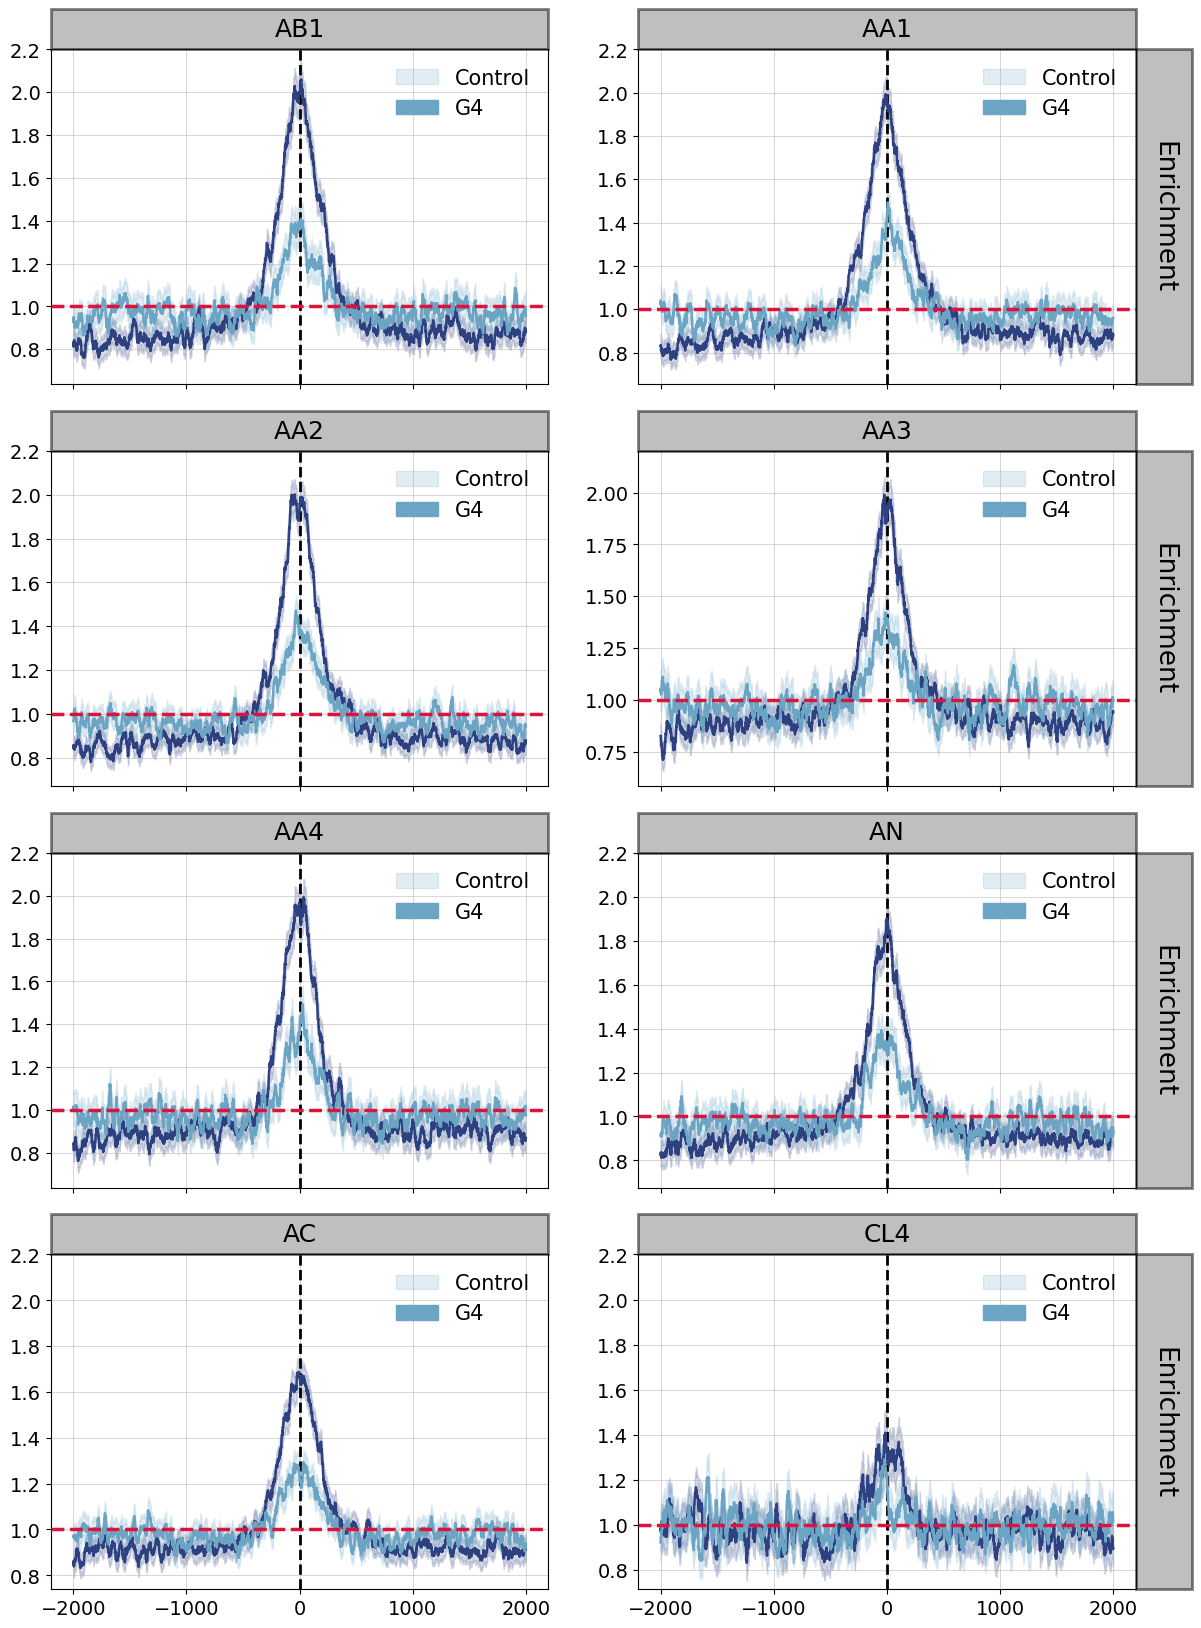

In [84]:
from matplotlib.pyplot import Rectangle
from matplotlib import patches as mpatches

kolmogorov_tests = dict()

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
ax = ax.flatten()

plt.subplots_adjust(wspace=0.18, hspace=0.2)
kolmogorov_tests = dict()
linewidth = 1.8
MODE = "G4HUNTER"
alleles = list(g4_coverage_prmd9_enrichment["allele"])
print(len(alleles))

alleles = ["AB1", "AA1", "AA2", "AA3", "AA4", "AN", "AC", "CL4"]
for idx, allele in enumerate(alleles):
    print(idx)
    df = load_density(MODE, allele=allele, window_size=window_size, alpha=alpha, N=N)
    df_control = load_density(MODE, allele=allele, window_size=window_size, alpha=alpha, N=N, control=True)

    cols = list(map(str,range(-window_size, window_size+1)))

    mean_values = df['average'].values
    ci_lower = df['q0025'].values
    ci_upper = df['q0975'].values

    control_mean_values = df_control['average'].values
    control_ci_lower = df_control['q0025'].values
    control_ci_upper = df_control['q0975'].values

    xaxis = range(-window_size, window_size+1)
    ax[idx].plot(xaxis, 
                    mean_values, 
                    color=color_templates['template']["Eukaryota"], 
                    lw=linewidth, 
                    zorder=3,
                    label="G4")
    ax[idx].fill_between(xaxis, 
                        y1=ci_lower, 
                        y2=ci_upper,
                        color=color_templates['template']["Eukaryota"], 
                            alpha=0.2
                    )

    ax[idx].plot(xaxis, 
            control_mean_values, 
            color=color_templates['non-template']["Eukaryota"], 
            lw=linewidth, 
            zorder=3,
            label="Control"
                )
    ax[idx].fill_between(xaxis, 
                     y1=control_ci_lower, 
                     y2=control_ci_upper,
                    color=color_templates['non-template']["Eukaryota"], 
                     alpha=0.2
                    )  
    
    def _modify_axis(ax, transcription_site):
        # xticks = ax.get_xticks()
        # ax.set_xticks(range(0, len(xticks), 100))
        if transcription_site == "start":
            # ax.set_ylabel("")
            ax.set_ylabel("")
        else:
            ax.set_ylabel("")
        ax.legend(prop={"size": 15}, handles=[mpatches.Patch(color=color_templates['non-template']['Eukaryota'],
                                                             label='Control',
                                                            alpha=0.2
                                                            ),
                                              mpatches.Patch(color=color_templates['non-template']['Eukaryota'],
                                                             label='G4',
                                                            )
                                             ],
                  frameon=False, shadow=False)
            
        ax.yaxis.label.set_size(16)
        ax.xaxis.label.set_size(16)
        ax.tick_params(axis="both", which="major", labelsize=14)
        if idx != 6 and idx != 7:
            ax.set_xticklabels([])
        ax.grid(axis="both", lw=0.6, alpha=0.6, zorder=0)
        ax.axvline(0, linestyle='--', color='black', lw=2.0)
        ax.axhline(1.0, linestyle='--', color='crimson', lw=2.5, zorder=5)
        return ax
    
    ax[idx] = _modify_axis(ax[idx], transcription_site="start")
    
    # fig.canvas.draw()
    # Get the bounding box of the second subplot in figure coordinates
    sites = ["Acceptor Site", "Donor Site"]
    
    # for i, site in zip(range(2), sites):
    bbox = ax[idx].get_position()
    rect_height = 0.02 # Height of the rectangle relative to figure
    rect_bottom = bbox.y1  # Bottom of the rectangle aligns with the top of the subplot
    rect_left = bbox.x0  # Left aligns with the subplot
    rect_width = bbox.x1 - bbox.x0  # Width matches the subplot
    
    # Add rectangle
    fig.patches.append(Rectangle((rect_left, rect_bottom), rect_width, rect_height,
                                 edgecolor="black",
                                 linewidth=2.0,
                                 transform=fig.transFigure, facecolor='gray', alpha=0.5))
    
    # Add title text
    fig.text(rect_left + rect_width / 2, 
             rect_bottom + rect_height / 2, 
             # title=site, 
             s=allele,
             ha='center', 
             va='center', 
             color='black', 
             fontsize=18
            )
    # Add rectangle
    if idx % 2 == 1:
        bbox = ax[idx].get_position()
        rect_width = 0.04  # Narrow width for a vertical bar
        rect_left = bbox.x1  # Align to the right of the y-axis
        rect_height = bbox.y1 - bbox.y0  # Match the subplot height
        rect_bottom = bbox.y0  # Align with the bottom of the subplot

        fig.patches.append(Rectangle((rect_left, rect_bottom), 
                                     rect_width, rect_height,
                                     edgecolor="black",
                                     linewidth=2.0,
                                     transform=fig.transFigure, facecolor='gray', alpha=0.5))
        
        # Add title text
        fig.text(rect_left + rect_width / 2, 
                 rect_bottom + rect_height / 2, 
                 s="Enrichment",
                 ha='center', 
                 va='center', 
                 color='black',
                 rotation=270,
                 fontsize=19
                )
    ax[idx].set_ylim(ymax=2.2)
    

fig.savefig(f"{target}/TSS_TES_distribution_PRMD9_g4_vs_control_{MODE}.pdf", dpi=600, bbox_inches="tight")